<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Data and Kaggle Challenge

## Model Tuning

In [3]:
#Import

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, Ridge, Lasso, LassoCV, ElasticNetCV, ElasticNet
pd.set_option('display.max_columns', 300)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [7]:
train = pd.read_csv("../datasets/clean_data/train_feature_ohe.csv")
clean = pd.read_csv("../datasets/clean_data/test_clean.csv")

In [198]:
#Prints various metrics for standarized data based on model
def model_metrics(X,X_train,X_test,y_train,y_test,model):
    model.fit(X_train,y_train)
    print(f"Training R-Squared: {model.score(X_train,y_train)}")
    print(f"Test R-Squared: {model.score(X_test,y_test)}")
    print(f"Cross-Val Score: {cross_val_score(model,X_train,y_train).mean()}")
    print(f"Training RMSE: {mean_squared_error(np.expm1(y_train), np.expm1(model.predict(X_train)))**0.5}")
    print(f"Testing RMSE: {mean_squared_error(np.expm1(y_test), np.expm1(model.predict(X_test)))**0.5}")
    X_1 = sm.add_constant(X)
    model_2 = sm.OLS(y,X_1)
    results = model_2.fit()
    print(results.summary())

## Baseline

In [199]:
X_base = train[["total_sq_ft"]]
y = train.sale_price

X_train, X_test, y_train, y_test = train_test_split(X_base,y,random_state = 100,train_size = .8, test_size = .2)
lr = LinearRegression()
model_metrics(X_base,X_train,X_test,y_train,y_test,lr)

Training R-Squared: 0.6601227449805733
Test R-Squared: 0.6518527818240154
Cross-Val Score: 0.6588994607288782
Training RMSE: 46731.18971535636
Testing RMSE: 40188.549506018324
                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     3953.
Date:                Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:13:59   Log-Likelihood:                 14.106
No. Observations:                2049   AIC:                            -24.21
Df Residuals:                    2047   BIC:                            -12.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err 

Baseline model has low R-squared and reasonably high RMSE. Model likely has high bias. Goal is to increase training and testing R-squared while lowering both RMSE values.

### Final Preprocessing

In [8]:
#instantiate feature matrix and response vector
X = train.copy()
X.drop(columns = ["sale_price"], inplace = True)
y = train.sale_price

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 100,train_size = .8, test_size = .2)
ss = StandardScaler()
ss.fit_transform(X_train)
ss.transform(X_test)

array([[ 0.74840198, -0.97861233,  0.02470831, ..., -0.14554656,
        -0.15612495, -0.09928891],
       [ 0.64112994, -0.97861233,  0.02470831, ..., -0.14554656,
        -0.15612495, -0.09928891],
       [-0.44165319,  0.70849038,  0.02470831, ..., -0.14554656,
        -0.15612495, -0.09928891],
       ...,
       [ 0.37494215,  0.70849038,  0.02470831, ..., -0.14554656,
        -0.15612495, -0.09928891],
       [-0.28929258,  0.70849038,  0.02470831, ..., -0.14554656,
        -0.15612495, -0.09928891],
       [ 0.33492596, -0.97861233,  0.02470831, ..., -0.14554656,
        -0.15612495, -0.09928891]])

## Linear Regression

In [201]:
lr = LinearRegression()

In [202]:
model_metrics(X,X_train,X_test,y_train,y_test,lr)

Training R-Squared: 0.9211270364105806
Test R-Squared: 0.8820865173158796
Cross-Val Score: 0.9004295195815016
Training RMSE: 20771.691713699
Testing RMSE: 21625.55260667853
                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     199.6
Date:                Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:14:10   Log-Likelihood:                 1458.7
No. Observations:                2049   AIC:                            -2701.
Df Residuals:                    1941   BIC:                            -2094.
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
                           coef    st

## Ridge Regression

In [56]:
#find best alpha hyperparameter for Ridge

alphas = np.logspace(0,5,100)
ridge_cv = RidgeCV(alphas = alphas, cv = 5)
ridge_cv.fit(X_train,y_train)

#find optimal alpha value
ridge_cv.alpha_

2.8480358684358014

In [57]:
model_metrics(X,X_train,X_test,y_train,y_test,Ridge(2.8480358684358014))

Training R-Squared: 0.9183739963479586
Test R-Squared: 0.8893169971985655
Cross-Val Score: 0.9027895589247127
Training RMSE: 21237.535162847227
Testing RMSE: 20655.926223488023
                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     199.6
Date:                Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                        02:30:35   Log-Likelihood:                 1458.7
No. Observations:                2049   AIC:                            -2701.
Df Residuals:                    1941   BIC:                            -2094.
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
                           coef  

## Lasso Regression

In [58]:
#find best alpha hyperparameter for Ridge

l_alphas = np.logspace(-3,0,100)
lasso_cv = LassoCV(alphas = l_alphas)
lasso_cv.fit(X_train,y_train)

LassoCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.09326033, 0.1       , 0.10722672, 0.1149757 , 0.12328467,
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]))

In [59]:
#find best alpha value
lasso_cv.alpha_

0.001

In [60]:
model_metrics(X,X_train,X_test,y_train,y_test,Lasso(.001))

Training R-Squared: 0.9061099428262145
Test R-Squared: 0.884690437389254
Cross-Val Score: 0.896759469010286
Training RMSE: 23096.270480365987
Testing RMSE: 21501.520031559045
                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     199.6
Date:                Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                        02:32:02   Log-Likelihood:                 1458.7
No. Observations:                2049   AIC:                            -2701.
Df Residuals:                    1941   BIC:                            -2094.
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
                           coef    

## ElasticNet Regressor

In [7]:
#Source: https://machinelearningmastery.com/elastic-net-regression-in-python/
#find best hyperparameters

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
ratios = np.arange(0, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1)
model.fit(X_train, y_train)

print(f'alpha: {model.alpha_})
print(f'l1_ratio_: {model.l1_ratio_})

alpha: 0.001000
l1_ratio_: 0.030000


In [8]:
model_metrics(X,X_train,X_test,y_train,y_test,ElasticNet(alpha = 0.001, l1_ratio = 0.03))

Training R-Squared: 0.9190421034708549
Test R-Squared: 0.889758304399986
Cross-Val Score: 0.9026267381717797
Training RMSE: 21139.031372955018
Testing RMSE: 20532.855899566217
                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     199.6
Date:                Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                        03:03:00   Log-Likelihood:                 1458.7
No. Observations:                2049   AIC:                            -2701.
Df Residuals:                    1941   BIC:                            -2094.
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
                           coef   

### Comparison

Model|Train R-Squared|Test R-Squared|Cross-val Score|Train RMSE|Test RMSE|
|---|---|---|---|---|---|
|**Linear Regression**|.92|.88|.90|20_771|21_626|
|**Ridge**|.92|.89|.90|21_238|20_656|
|**Lasso**|.91|.88|.90|20_096|21_501|
|**ElasticNet**|.92|.89|.90|21_139|20_532|

Models performed very similarly across the metrics. All models seem to not have too much variance or bias. Based on these experiments, I would most likely continue production with the Ridge or ElasticNet model due to slightly superior performance on the test data. 

## Inferential Model

In [9]:
#create simple inferential model
features = ["overall_qual", "utilities", "functional", "garage_qual", "lot_frontage", "lot_shape",]

X_inferential = X[features]
ss = StandardScaler()
ss.fit_transform(X_inferential)

array([[-0.07622275,  0.02888463,  0.19085417,  0.29645439,  0.28680785,
        -0.99999522],
       [ 0.6272926 ,  0.02888463,  0.19085417,  0.29645439, -1.28362295,
        -0.99999522],
       [-0.77973809,  0.02888463,  0.19085417,  0.29645439,  0.07547816,
         0.69871079],
       ...,
       [-0.07622275,  0.02888463,  0.19085417, -1.258059  , -0.44912152,
         0.69871079],
       [-1.48325343,  0.02888463,  0.19085417,  0.29645439,  0.55983847,
         0.69871079],
       [ 0.6272926 ,  0.02888463,  0.19085417,  0.29645439, -0.29678087,
         0.69871079]])

In [10]:
lr = LinearRegression()
lr.fit(X_inferential,y)


LinearRegression()

In [11]:
preds = lr.predict(X_inferential)
resid = y - preds

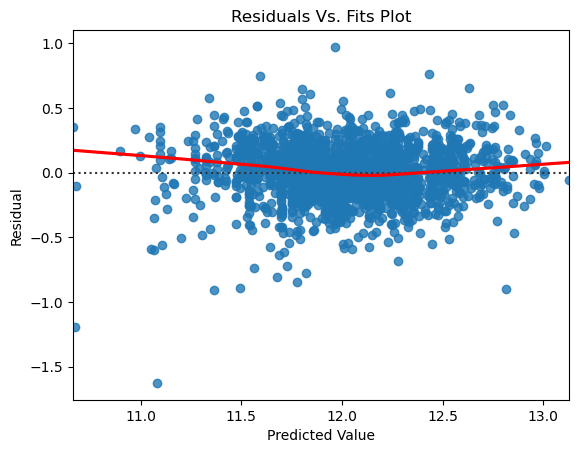

In [12]:
sns.residplot(x = preds,
              y = resid,
              lowess = True, #help visualize relationship
              line_kws = {'color': 'red'})\
    .set(title = 'Residuals Vs. Fits Plot',
        xlabel = 'Predicted Value',
        ylabel = 'Residual');

Linearity is not met because residuals do not remain close to zero across entire plot.
Equality of Variance is not met because the distribution of the residuals is not equally spread around the line $y = 0$.

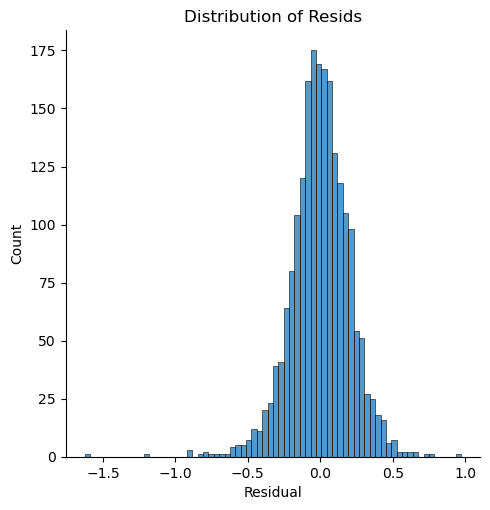

In [13]:
#create residuals histogram
sns.displot(resid, )\
    .set(title='Distribution of Resids',
         xlabel='Residual')

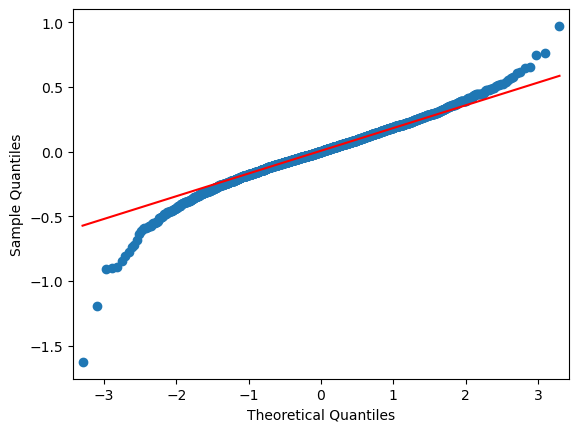

In [14]:
#create q-q plot
sm.qqplot(resid,
          dist=stats.norm,
          line='q');

Distribution of residuals is skewed and not normal.

In [211]:
from statsmodels.stats.stattools import durbin_watson
#Durbin Watson Test
durbin_watson(resid)

2.041671852236701

Based on Durbin Watson Test, Independence of Errors most likely is met.

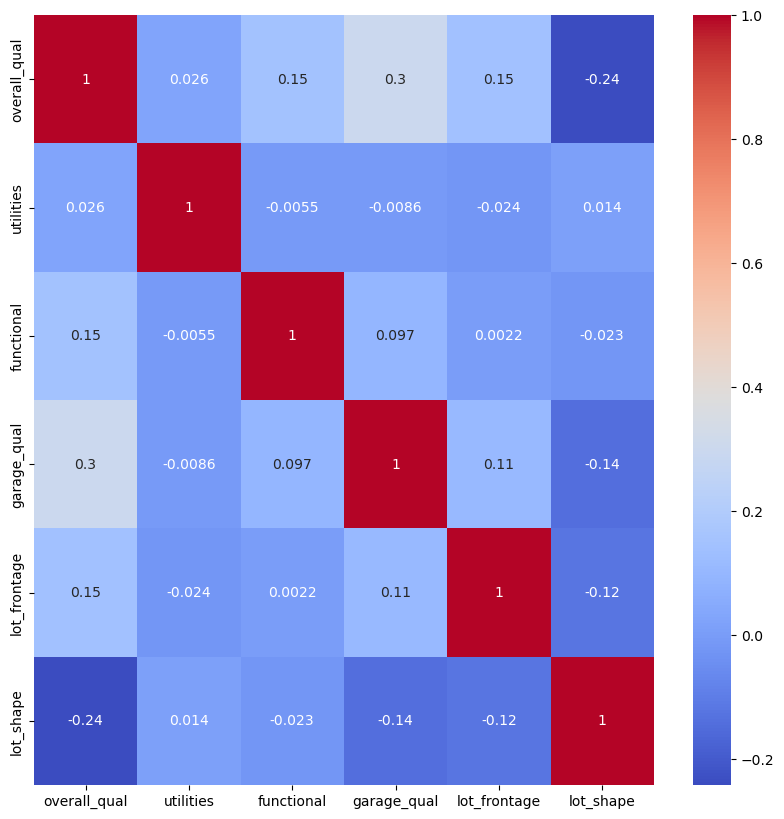

In [15]:
#plot correlation heatmap
plt.figure(figsize = (10,10))
sns.heatmap(X_inferential.corr(),
            annot = True,
           cmap = 'coolwarm')
plt.savefig("../images/inferential_heat_map.png");

There doesn't seem to be noticeable multicorrelation.

In [220]:
X = sm.add_constant(X_inferential)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     1039.
Date:                Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:54:07   Log-Likelihood:                 346.05
No. Observations:                2049   AIC:                            -678.1
Df Residuals:                    2042   BIC:                            -638.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.6706      0.399     21.753      0.000       7.889       9.452
overall_qual     0.2124      0.003     61.429      0.000       0.206       0.219
utilities        0.4932      0.273      1.805      0.071      -0.043       1.029
functional       0.2569      0.061      4.187      0.000       0.137       0.377
garage_qual      0.1585      0.018      8.668      0.000       0.123       0.194
lot_frontage     0.2617      0.014     18.821      0.000       0.234       0.289
lot_shape       -0.2371      0.028     -8.556      0.000      -0.291      -0.183
==============================================================================
Omnibus:                      261.683   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1228.825
Skew:                          -0.520   Prob(JB):                    1.46e-267
Kurtosis:                       6.648   Cond. No.                         849.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X_inferential,y,random_state = 100,train_size = .8, test_size = .2)
model_metrics(X_inferential,X_train,X_test,y_train,y_test,LinearRegression())

Training R-Squared: 0.7627825786931957
Test R-Squared: 0.7050178057878584
Cross-Val Score: 0.7578457410762186
Training RMSE: 39498.266965728486
Testing RMSE: 38006.1754922649
                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     1039.
Date:                Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:54:23   Log-Likelihood:                 346.05
No. Observations:                2049   AIC:                            -678.1
Df Residuals:                    2042   BIC:                            -638.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err 

Model meets 2 of the 5 MLR assumptions. Due to this, we can't have extreme confidence that the coefficients of each of these variables is valid. Model can be furter improved with addition of more features while analyzing pre-existing ones that may be contributing to the violations of the MLR assumptions.

## Conclusion

Overall, the predictive models didn't meet all of the standards outlined in the problem statement. Nevertheless, the consistent RMSE scores and R-squared values indicate that an effective regression model can be constructed with the given data. Based on these experiments, I would most likely continue production with the Ridge or ElasticNet model due to slightly superior performance on the test data. Changing the manner in which data was cleaned, adjusting encoding of categorical variables, and rethinking numerical feature engineering are just a few examples of how to improve the metrics. Unfortunately, the complexity of this model and its violation of MLR assumptions leave any interpretation of the impact of individual variables on sale price as a lost cause. Perhaps it is possible to restructure these models in order to create one that has decent predictive and inferential capabilities for not just this city but many others. Also, future exploration of these data sets with more advnaced machine learning models may prove to yield even greater performance.